In [1]:
import sys
sys.path.append("/home/huaqingj/MyResearch/TVDN")

In [2]:
from pyTVDN import TVDNDetect
from pathlib import Path
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from pyTVDN.TVDNutils import GetBsplineEst
from scipy.signal import detrend
%matplotlib inline

In [3]:
resDir = Path("../results")
dataDir = Path("../data")

In [4]:
filname = Path("fMRI_samples.mat")
fMRIs = loadmat(dataDir/filname)["clean_subjects"]

## Obtain the dataset

In [5]:
fMRI = fMRIs[0, 9]["fMRI"][:90, :]

## 1. Detection with No Bspline

1. Detrend the observation
2. No B-spline
3. Do the detection
4. Plot the (detrended) observed `Ymat` and reconstructed `Xmat`

In [6]:
fMRIdetNoSpl = TVDNDetect(Ymat=fMRI, saveDir=None, dataType="fMRI", fName="fMRIsample", showProgress=True,
                     r=6, kappa=1.65, fct=0.5, lamb=8e-5, plotfct=180, downRate=4, MaxM=10, Lmin=4, freq=0.5, is_detrend=True)

The parameters for detection are:
{'Lmin': 4,
 'MaxM': 10,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRIsample',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': True,
 'kappa': 1.65,
 'lamb': 8e-05,
 'plotfct': 180,
 'r': 6}


In [7]:
fMRIdetNoSpl._Preprocess()

In [8]:
d, n = fMRIdetNoSpl.nYmat.shape
T = fMRIdetNoSpl.paras.T
time = np.linspace(0, T, n)
Xmat = fMRIdetNoSpl.nYmat

In [9]:
deltaT = np.diff(time)[0]
dXmat0 = np.diff(fMRIdetNoSpl.nYmat, axis=1)/deltaT
dXmatLast = np.mean(dXmat0, axis=1).reshape(90, 1)
dXmat = np.concatenate((dXmat0, dXmatLast), axis=1)

In [10]:
fMRIdetNoSpl.dXmat, fMRIdetNoSpl.Xmat = dXmat, Xmat

In [11]:
fMRIdetNoSpl()

In [12]:
kappas = np.arange(1.0, 2.0, step=0.01)
fMRIdetNoSpl.TuningKappa(kappas)

In [13]:
print("The optimal kappas are:", fMRIdetNoSpl.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", fMRIdetNoSpl.optKappaOptNumChg)
print("The optimal number of change point is:", fMRIdetNoSpl.optNumChg)

The optimal kappas are: 1.0
The optimal number of change point under the range of kappa we speicified is: 10
The optimal number of change point is: 5


In [14]:
fMRIdetNoSpl.UpdateEcpts()
print(fMRIdetNoSpl)

+-------------+-------------------------------------------+--------------------+------+
| Num of CPTs |               Estiamted CPTs              |        MSE         | Rank |
+-------------+-------------------------------------------+--------------------+------+
|      10     | [ 4.  8. 14. 18. 22. 26. 30. 34. 38. 42.] | 1.5652392267440822 |  6   |
+-------------+-------------------------------------------+--------------------+------+


### No detrended reconstructed curve

The plot indices are [50  2 60 76  9].


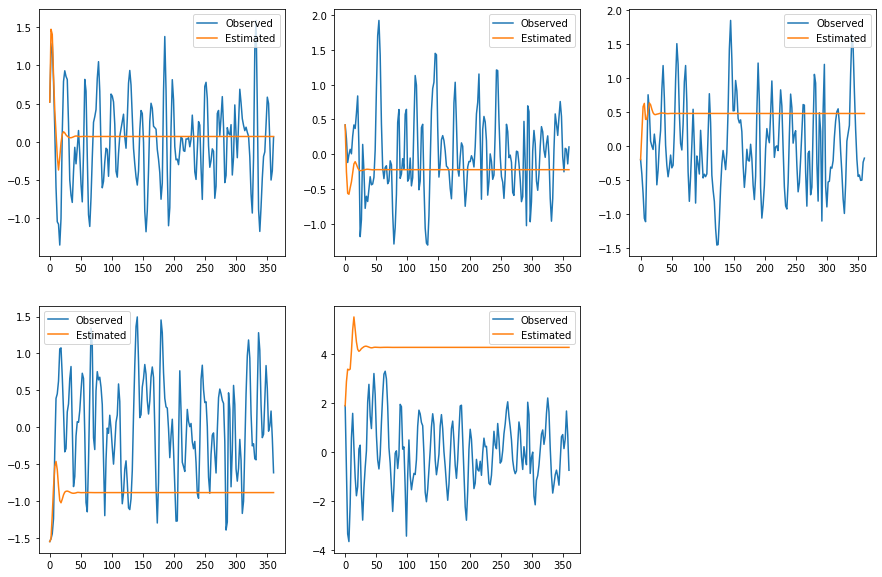

In [15]:
fMRIdetNoSpl.PlotRecCurve()

### Detrend the estimated `Xmat` and plot the results

In [16]:
fMRIdetNoSpl.RecResCur.EstXmatReal = detrend(fMRIdetNoSpl.RecResCur.EstXmatReal)

The plot indices are [50, 2, 60, 76, 9].


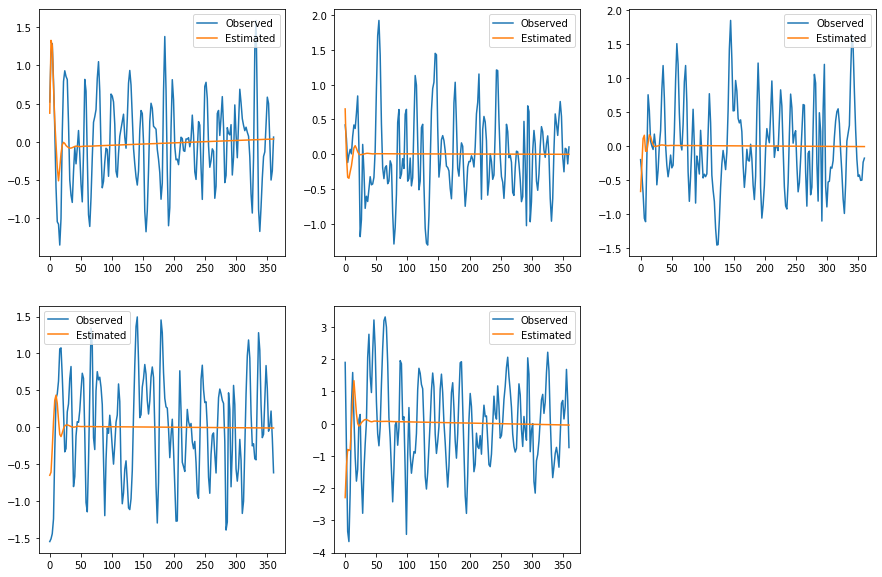

In [17]:
fMRIdetNoSpl.PlotRecCurve(idxs=[50, 2, 60, 76, 9])

## 2. Detection with  B-spline seperate on `Xmat` and `dXmat`

2. Detrend the observation
1. Do b-spline seperately on `Xmat`(`1e-6`) and `dXmat`(`8e-5`)
3. Do the detection
4. Plot the (detrended) observed `Ymat` and reconstructed `Xmat`

In [18]:
fMRIdet = TVDNDetect(Ymat=fMRI, saveDir=None, dataType="fMRI", fName="fMRIsample", showProgress=True,
                     r=6, kappa=1.65, fct=0.5, lamb=8e-5, plotfct=180, downRate=4, MaxM=10, Lmin=4, freq=0.5, is_detrend=True)

The parameters for detection are:
{'Lmin': 4,
 'MaxM': 10,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRIsample',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': True,
 'kappa': 1.65,
 'lamb': 8e-05,
 'plotfct': 180,
 'r': 6}


In [19]:
fMRIdet._Preprocess()

In [20]:
d, n = fMRIdet.nYmat.shape
T = fMRIdet.paras.T
time = np.linspace(0, T, n)
Xmat = fMRIdet.nYmat

In [21]:
deltaT = np.diff(time)[0]
dXmat0 = np.diff(fMRIdet.nYmat, axis=1)/deltaT
dXmatLast = np.mean(dXmat0, axis=1).reshape(90, 1)
dXmat = np.concatenate((dXmat0, dXmatLast), axis=1)

In [22]:
_, Xmat = GetBsplineEst(Xmat, time, lamb=1e-6)
_, dXmat = GetBsplineEst(dXmat, time, lamb=8e-5)

In [23]:
fMRIdet.dXmat, fMRIdet.Xmat = dXmat, Xmat

In [24]:
fMRIdet()

In [25]:
kappas = np.arange(1.0, 2.0, step=0.01)
fMRIdet.TuningKappa(kappas)

In [26]:
print("The optimal kappas are:", fMRIdet.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", fMRIdet.optKappaOptNumChg)
print("The optimal number of change point is:", fMRIdet.optNumChg)

The optimal kappas are: 1.0
The optimal number of change point under the range of kappa we speicified is: 10
The optimal number of change point is: 10


In [27]:
fMRIdet.UpdateEcpts()
print(fMRIdet)

+-------------+-----------------------------------------------------+--------------------+------+
| Num of CPTs |                    Estiamted CPTs                   |        MSE         | Rank |
+-------------+-----------------------------------------------------+--------------------+------+
|      10     | [ 12.  68.  74.  88. 111. 143. 151. 158. 164. 171.] | 1.1415528802186625 |  6   |
+-------------+-----------------------------------------------------+--------------------+------+


### No detrended reconstructed curve

The plot indices are [87 23 70 57 40].


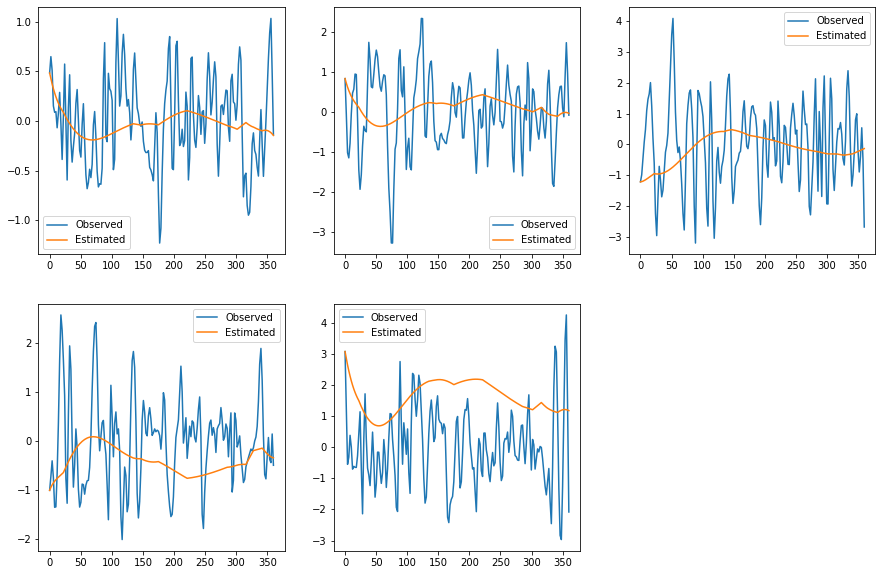

In [28]:
fMRIdet.PlotRecCurve()

### Detrend the estimated `Xmat` and plot the results

In [29]:
fMRIdet.RecResCur.EstXmatReal = detrend(fMRIdet.RecResCur.EstXmatReal)

The plot indices are [87, 23, 70, 57, 40].


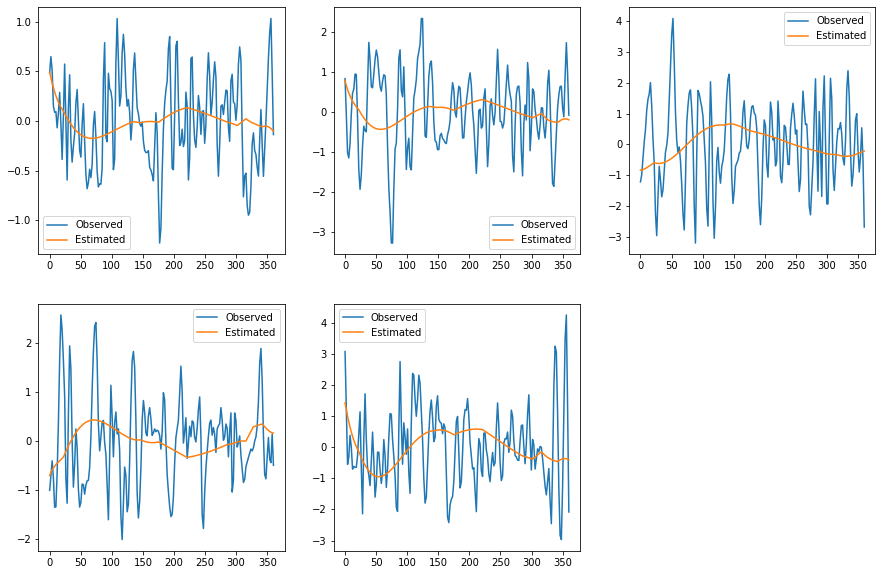

In [30]:
fMRIdet.PlotRecCurve(idxs=[87, 23, 70, 57, 40])

## 3. Detection with  B-spline  (`8e-5`)

1. Detrend the observation
2. B-spline with `8e-5`
3. Do the detection
4. Plot the (detrended) observed `Ymat` and reconstructed `Xmat`

In [6]:
fMRIdet = TVDNDetect(Ymat=fMRI, saveDir=None, dataType="fMRI", fName="fMRIsample", showProgress=True,
                     r=6, kappa=1.65, fct=0.5, lamb=8e-5, plotfct=180, downRate=4, MaxM=10, Lmin=4, freq=0.5, is_detrend=True)

The parameters for detection are:
{'Lmin': 4,
 'MaxM': 10,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRIsample',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': True,
 'kappa': 1.65,
 'lamb': 8e-05,
 'plotfct': 180,
 'r': 6}


In [7]:
fMRIdet()

In [8]:
kappas = np.arange(1.0, 2.0, step=0.01)
fMRIdet.TuningKappa(kappas)

In [9]:
print("The optimal kappas are:", fMRIdet.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", fMRIdet.optKappaOptNumChg)
print("The optimal number of change point is:", fMRIdet.optNumChg)

The optimal kappas are: 1.5700000000000005
The optimal number of change point under the range of kappa we speicified is: 5
The optimal number of change point is: 4


In [10]:
fMRIdet.UpdateEcpts()
print(fMRIdet)

+-------------+----------------------------+--------------------+------+
| Num of CPTs |       Estiamted CPTs       |        MSE         | Rank |
+-------------+----------------------------+--------------------+------+
|      5      | [ 11.  29.  56.  85. 157.] | 1.3166148609222745 |  6   |
+-------------+----------------------------+--------------------+------+


### No detrended reconstructed curve

The plot indices are [60  2 27 24 40].


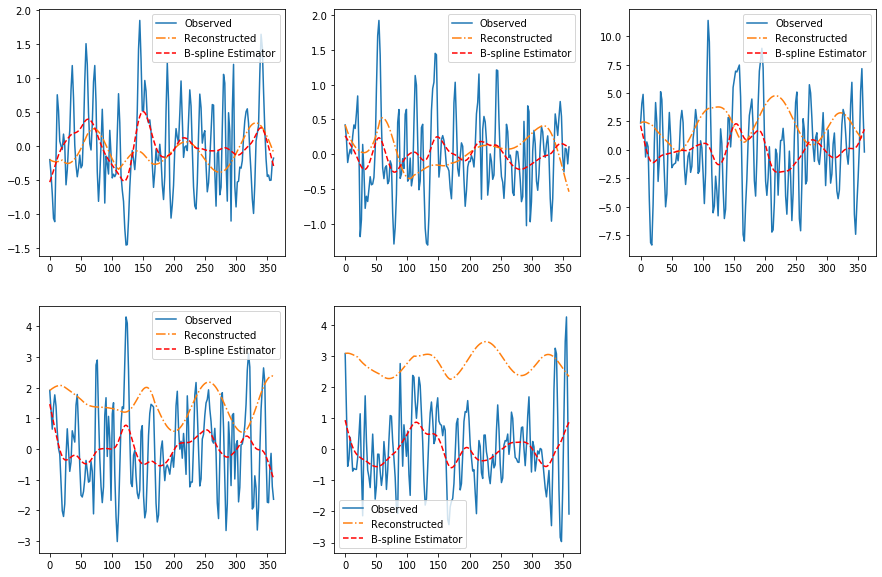

In [12]:
fMRIdet.PlotRecCurve(is_bsp=True, saveFigPath="./OrdRecon.jpg")

### Detrend the estimated `Xmat` and plot the results

In [37]:
fMRIdet.RecResCur.EstXmatReal = detrend(fMRIdet.RecResCur.EstXmatReal)

The plot indices are [60, 2, 27, 24, 40].


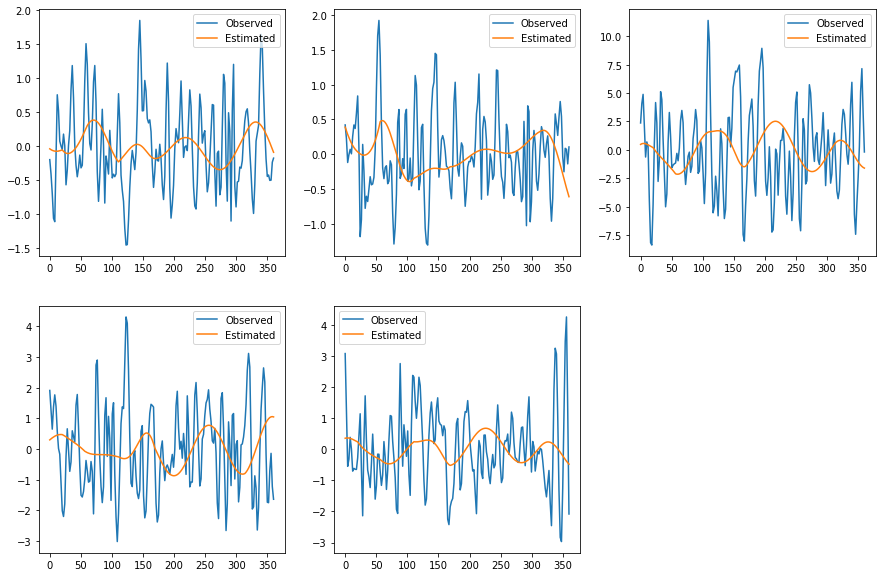

In [38]:
fMRIdet.PlotRecCurve(idxs=[60, 2, 27, 24, 40])

## 4. Detection with  B-spline  (`8e-5`) and no detrend

1. B-spline with `8e-5`
3. Do the detection
4. Plot the (detrended) observed `Ymat` and reconstructed `Xmat`

In [39]:
fMRIdet = TVDNDetect(Ymat=fMRI, saveDir=None, dataType="fMRI", fName="fMRIsample", showProgress=True,
                     r=6, kappa=1.65, fct=0.5, lamb=8e-5, plotfct=180, downRate=4, MaxM=10, Lmin=4, freq=0.5, is_detrend=False)

The parameters for detection are:
{'Lmin': 4,
 'MaxM': 10,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRIsample',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': False,
 'kappa': 1.65,
 'lamb': 8e-05,
 'plotfct': 180,
 'r': 6}


In [40]:
fMRIdet()

In [41]:
kappas = np.arange(1.0, 2.0, step=0.01)
fMRIdet.TuningKappa(kappas)

In [42]:
print("The optimal kappas are:", fMRIdet.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", fMRIdet.optKappaOptNumChg)
print("The optimal number of change point is:", fMRIdet.optNumChg)

The optimal kappas are: 1.5700000000000005
The optimal number of change point under the range of kappa we speicified is: 5
The optimal number of change point is: 4


In [43]:
fMRIdet.UpdateEcpts()
print(fMRIdet)

+-------------+----------------------------+--------------------+------+
| Num of CPTs |       Estiamted CPTs       |        MSE         | Rank |
+-------------+----------------------------+--------------------+------+
|      5      | [ 11.  29.  56.  85. 157.] | 1.3166149955079542 |  6   |
+-------------+----------------------------+--------------------+------+


### No detrended reconstructed curve

The plot indices are [60  2 27 24 40].


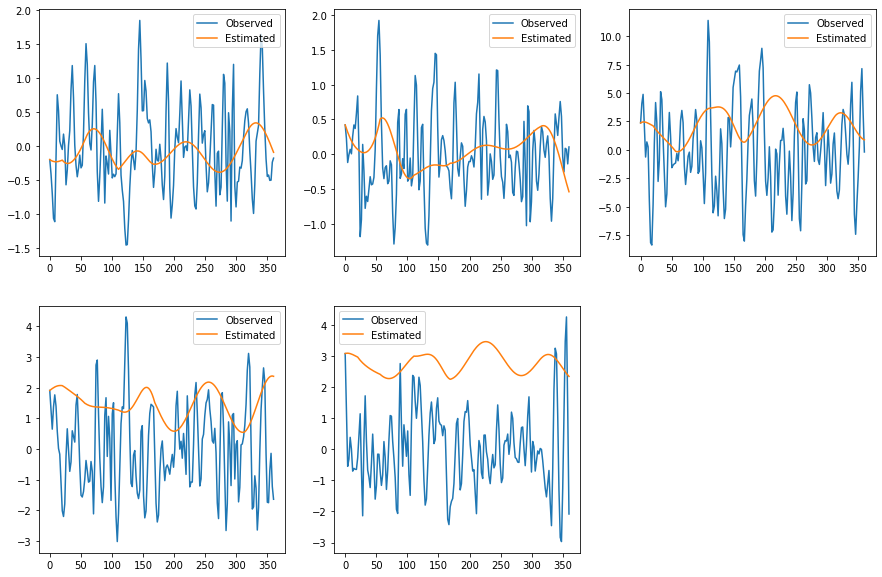

In [44]:
fMRIdet.PlotRecCurve()

### Detrend the estimated `Xmat` and plot the results

In [45]:
fMRIdet.RecResCur.EstXmatReal = detrend(fMRIdet.RecResCur.EstXmatReal)

The plot indices are [60, 2, 27, 24, 40].


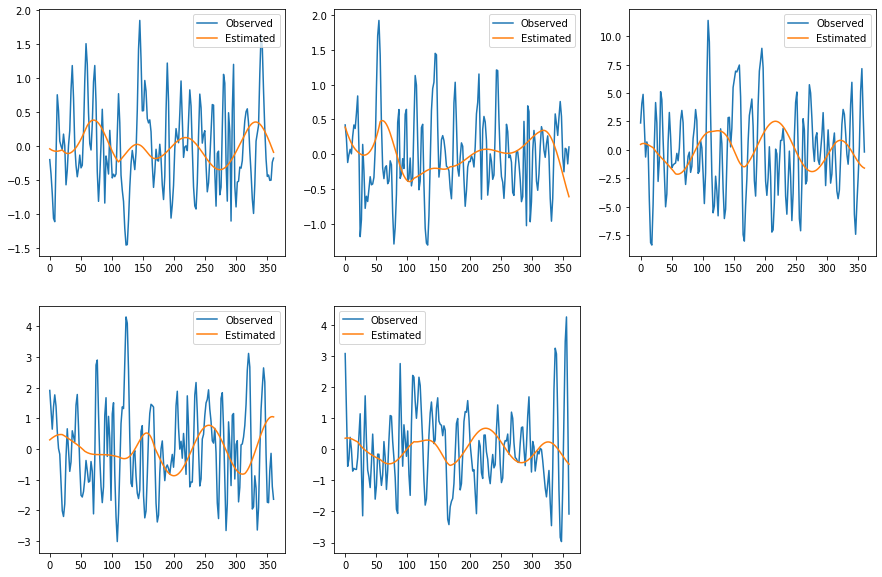

In [46]:
fMRIdet.PlotRecCurve(idxs=[60, 2, 27, 24, 40])